In [98]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import multivariate_normal

In [2]:
fname = '/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_wcpg/CLOZUK_SCZ_2018_withPGC.outtag=run2.testR7.json'
data_tmp = json.loads(open(fname).read())
    

In [86]:
data_tmp.keys()

dict_keys(['options', 'analysis', 'params', 'optimize', 'inft_params', 'inft_optimize', 'ci', 'power'])

In [9]:
np.nanmedian(data_tmp['power']['snp_svec_clump'][:100])

0.007815866265445948

In [10]:
np.nanmedian(data_tmp['power']['snp_svec_total'][:100])

0.008978402707725763

In [15]:
np.nanmax(data_tmp['power']['snp_svec_total'])

0.7727971076965332

In [14]:
np.nanmax(data_tmp['power']['snp_svec_clump'])

0.7727971076965332

In [28]:
c = np.array(data_tmp['power']['snp_svec_clump'])
t = np.array(data_tmp['power']['snp_svec_total'])
idx = range(1000, 1010)
print(c[idx])
print(t[idx])

[       nan        nan        nan        nan        nan        nan
 0.00016641        nan        nan        nan]
[           nan            nan 2.20708134e-05 4.36931215e-02
 2.02915794e-03            nan 1.66411279e-04 2.01635715e-02
 1.34246016e-03 3.97507139e-02]


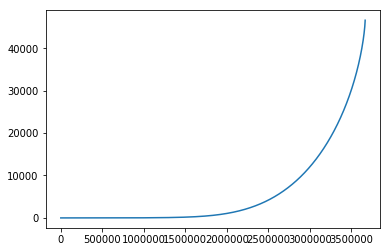

In [40]:
plt.plot(np.cumsum(sorted(t[np.isfinite(t)])))

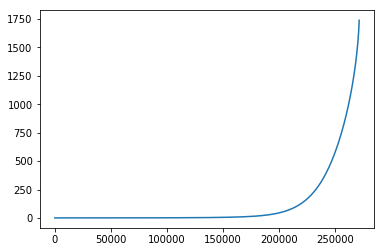

In [39]:
plt.plot(np.cumsum(sorted(c[np.isfinite(c)])))

/home/oleksanf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([38721.,  8241.,  2285.,   698.,   515.,   245.,    73.,   110.,
           56.,   126.]),
 array([0.10000046, 0.16728013, 0.23455979, 0.30183946, 0.36911912,
        0.43639879, 0.50367845, 0.57095811, 0.63823778, 0.70551744,
        0.77279711]),
 <a list of 10 Patch objects>)

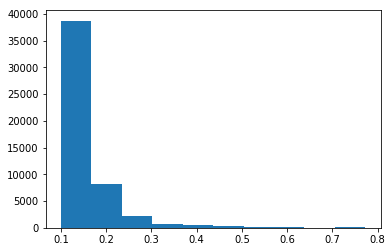

In [34]:
plt.hist(t[np.isfinite(t) & (t>0.1)])

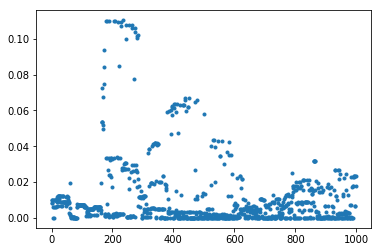

In [43]:
plt.plot(t[np.isfinite(t)][:1000], '.')

In [146]:
np.where(c>0.75)

/home/oleksanf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([4384355, 4672908]),)

In [156]:
data['options']['totalhet']/data['options']['num_snp']

0.2075013321188637

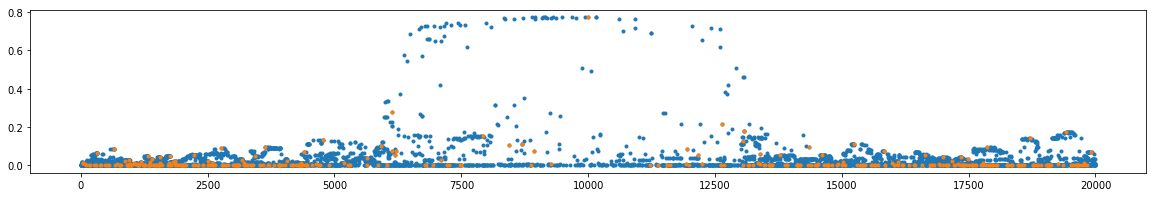

In [152]:
plt.figure(figsize=(20, 3))
b=10000
a=4672908
plt.plot(t[(a-b):(a+b)], '.', c[(a-b):(a+b)], '.')

## plt.plot(c[:1000], '.')

In [82]:
data.keys()

NameError: name 'data' is not defined

In [74]:
c

array([nan, nan, nan, ..., nan, nan, nan])

In [137]:
for trait in ['PGC_SCZ_2014_EUR', 'PGC_SCZ_0518_EUR', 'CLOZUK_SCZ_2018_withPGC']:
    fname = '/home/oleksanf/vmshare/data/mixer_analysis/python_mixer_wcpg/{}.outtag=run2.testR9.json'.format(trait)
    data = json.loads(open(fname).read())
    print(fname.split('/')[-1])
    for threshold in [0.5,  0.9]:
        a=[np.power(10, float(interp1d(data_power['svec'], np.log10(data_power['nvec']))(threshold))) for data_power in data['power_ci']]
        b=[float(interp1d(np.log10(data_power['nvec']),data_power['svec'])(np.log10(data['options']['trait1_nval']))) for data_power in data['power_ci']]
        print([threshold, np.mean(a), np.std(a), np.mean(b), np.std(b)])

PGC_SCZ_2014_EUR.outtag=run2.testR9.json
[0.5, 899108.2921599138, 36344.886902924176, 0.025904028167012188, 0.0019518859222300386]
[0.9, 7561243.152657058, 300209.51242455206, 0.025904028167012188, 0.0019518859222300386]
PGC_SCZ_0518_EUR.outtag=run2.testR9.json
[0.5, 958490.8338560858, 29393.120349607518, 0.057718504397493146, 0.002934993417400897]
[0.9, 7615567.966919883, 227555.60431995892, 0.057718504397493146, 0.002934993417400897]
CLOZUK_SCZ_2018_withPGC.outtag=run2.testR9.json
[0.5, 863585.4909425201, 27162.774734093196, 0.04645155111591874, 0.0024638437461587523]
[0.9, 6824759.8661072245, 221242.4488872194, 0.04645155111591874, 0.0024638437461587523]


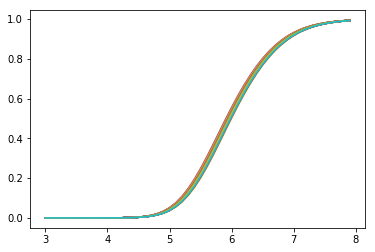

In [93]:

for i in range(100):
    plt.plot(np.log10(data['power_ci'][i]['nvec']), data['power_ci'][i]['svec'])
    

[0.5, 899108.2921599138, 36344.886902924176, 0.025904028167012188, 0.0019518859222300386]
[0.9, 7561243.152657058, 300209.51242455206, 0.025904028167012188, 0.0019518859222300386]
